## California Housing Price Prediction

This is the start of makimg the basic housing price prediction model using real life data taken from california's housing plan. As per the reference from HOML-3

Lets begin...

In [1]:
import subprocess
import sys

library_imports = [
    "numpy",
    "matplotlib",
    "pandas",
    "scikit-learn"
]

def install_package(package):
    subprocess.run([sys.executable, "-m", "pip", "install", package])

def freeze_packages():
    with open("requirements.txt", "w") as req_file:
        subprocess.run([sys.executable, "-m", "pip", "freeze"], stdout=req_file)

for package in library_imports:
    install_package(package)

freeze_packages()

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as housing_dataset:
            housing_dataset.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

Generating housing info..

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

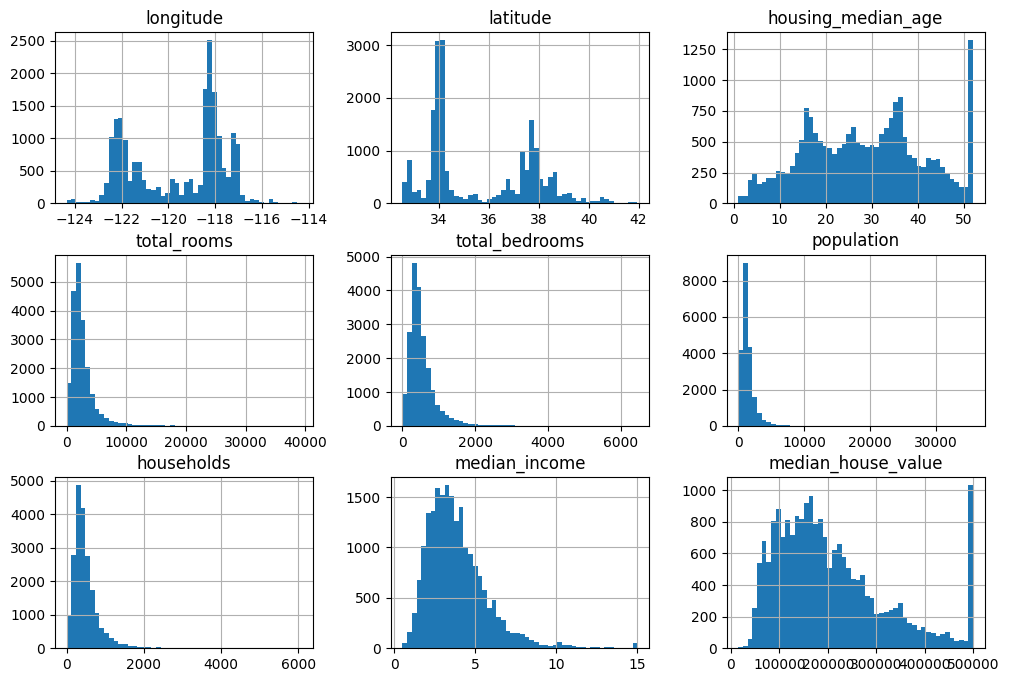

In [5]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(12,8))
plt.show()

## Create a Test Set

In [6]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
import numpy as np

def shufle_and_split(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))

    print(shuffled_indices)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices],data. iloc[test_indices]
 
# housing = pd.DataFrame([1,2,3,4,5,6])
train,test = shufle_and_split(housing,.2)

print("Total length: ",len(housing))
print("The Length of train:",len(train))
print("The Length of test:",len(test))

[17964 16488 14605 ...  9980  1223  8760]
Total length:  20640
The Length of train: 16512
The Length of test: 4128


In [8]:
# from zlib import crc32

# def is_id_in_test_set(val,set_ratio):
#     return crc32(np.int64(val)) < set_ratio * 2**32
    
# def splits_data_with_id(data,test_ratio,id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
#     return data.loc[~in_test_set],data.loc[in_test_set]

# xy = housing.reset_index()
# train,test = splits_data_with_id(xy,0.2,"index") 

In [9]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(housing,test_size=0.2,random_state=42)

# Stratified Data Splitting

This process is used to split data based on their categories 

In [10]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Text(0, 0.5, 'Number of districts')

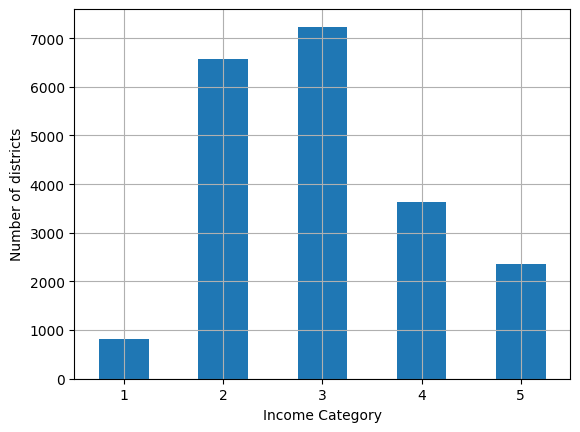

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0,1.5,3,4.5,6,np.inf],
                               labels=[1,2,3,4,5]
                               )

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")

Time for Stratified Shuffle Split based on income data

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_split_n = housing.iloc[train_index]
    strat_test_split_n = housing.iloc[test_index]
    strat_splits.append([strat_train_split_n,strat_test_split_n])

but the above solution will give you 10 unique split of the same dataset, we can go for first element(split) [0]

or we can do it by one go

In [13]:
strat_train_set,strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify=housing["income_cat"])

In [14]:
income_prop = strat_test_set["income_cat"].value_counts()/len(strat_test_set)
income_prop

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
#extra codes -  for computing the data

def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

compare_props = pd.DataFrame({
    "Overall%":income_cat_proportions(housing),
    "Stratified%":income_cat_proportions(strat_test_set),
    "Random%":income_cat_proportions(test_set),            
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error%"] = (compare_props["Stratified%"]/compare_props["Overall%"]-1)
compare_props["Rand. Error%"] = (compare_props["Random%"]/compare_props["Overall%"]-1)

(compare_props * 100).round(2)

,Overall%,Stratified%,Random%,Strat. Error%,Rand. Error%
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Now, I should drop "income_cat" column since I wont be using it again and for short time, it gave us our purpose

In [17]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

# Discover and Visualize the Data to Gain Insights

In [ ]:
housing = strat_train_set.copy()

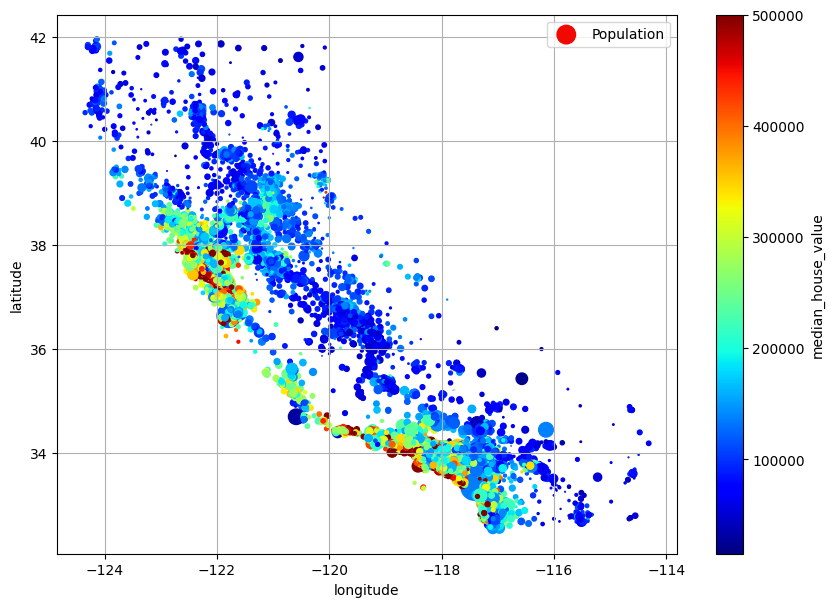

In [29]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid="True",
    s=housing["population"]/100,
    label="Population",
    c="median_house_value",
    cmap="jet",
    figsize=(10,7)
    )
plt.show()

Now, we can do is perform standard correlations between every pair of attribute using the corr() method

In [35]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Now lets go for visual correlatons (instead of going through entire 11 attributes, we are going for essential one)

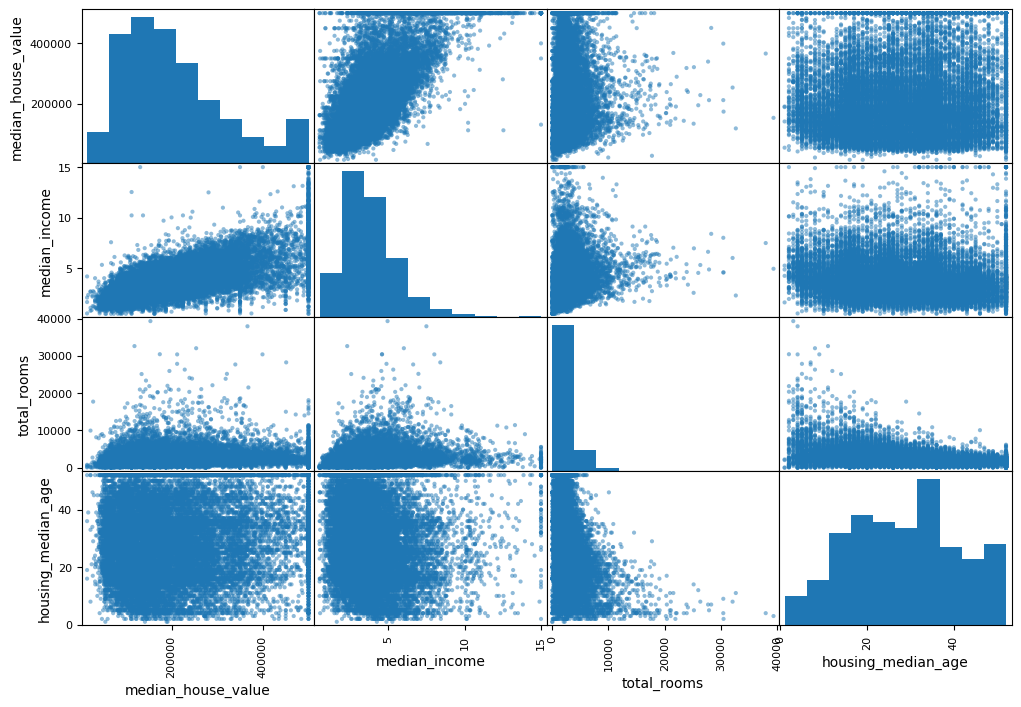

In [42]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value","median_income","total_rooms","housing_median_age"
    ]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

we see that the plot in median_house_value x median_income looks promising since the plot is shown to be diagonal(close coefficient of correlation is **0.69** approx) 

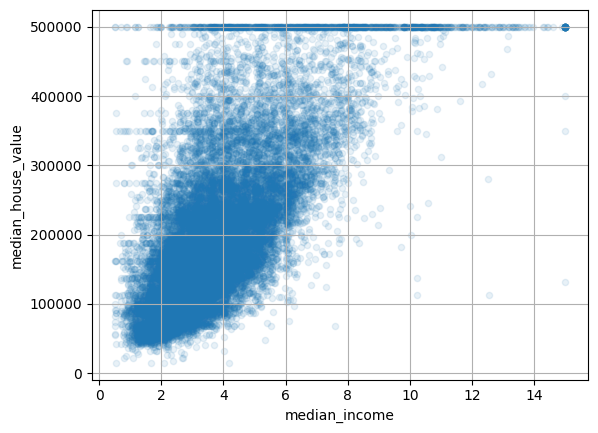

In [44]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)
plt.show()

In [46]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [48]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64